In [70]:
# OASIS INFOBYTE DATASCIENCE INTERNSHIP
## TASK 5
### PIYASA BERA
#### EMAIL SPAMMING DETECTION WITH MACHINE LEARNING

In [71]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [73]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [74]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [77]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [78]:
df.shape

(5572, 5)

In [79]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [80]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [81]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [82]:
from sklearn.preprocessing import LabelEncoder

# 0=ham, 1=spam
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [83]:
df.duplicated().sum()

403

In [84]:
#remove duplicates

df=df.drop_duplicates(keep='first')

In [85]:
df.duplicated().sum()

0

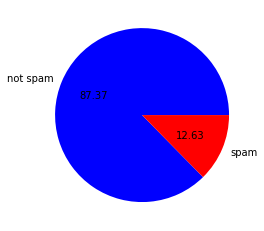

In [86]:
# Exploitary data analysis

#ham & spam in pie chart

plt.pie(df['target'].value_counts(),labels=['not spam','spam'],colors=['blue','red'],autopct='%0.2f')
plt.show()

In [87]:
# adding three numerical columns named - 
# 1. number of characters
# 2. number of words
# 3. number of sentences

import nltk

In [88]:
#number of charecters

df['no_characters'] = df['text'].apply(len)
df.sample(5)

C:\Users\piyas\AppData\Local\Temp\ipykernel_21232\103410752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_characters'] = df['text'].apply(len)


,target,text,no_characters
61,0,Ha ha ha good joke. Girls are situation seekers.,48
3664,0,Ha... U jus ate honey ar? So sweet...,37
2460,0,i cant talk to you now.i will call when i can....,64
3760,0,Was just about to ask. Will keep this one. May...,110
54,1,SMS. ac Sptv: The New Jersey Devils and the De...,120


In [89]:
df['no_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

C:\Users\piyas\AppData\Local\Temp\ipykernel_21232\993757804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,no_characters,no_words
2114,1,Sunshine Hols. To claim ur med holiday send a ...,161,36
2902,0,Tell me pa. How is pain de.,27,8
3471,0,I think IÛ÷m waiting for the same bus! Inform...,92,22
3208,0,Havent mus ask if u can 1st wat. Of meet 4 lun...,134,37
2535,0,Can you pls pls send me a mail on all you know...,155,34


In [90]:
#number of sentence

df['no_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

C:\Users\piyas\AppData\Local\Temp\ipykernel_21232\2347243663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,no_characters,no_words,no_sentences
1532,0,Unfortunately i've just found out that we have...,172,40,2
2939,1,You have 1 new message. Please call 08712400200.,48,10,2
4863,0,Sorry da..today i wont come to play..i have dr...,58,15,1
4580,0,Not course. Only maths one day one chapter wit...,75,17,2
4778,0,O we cant see if we can join denis and mina? O...,74,18,2


In [91]:
#statistical checking

df[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [92]:
# ham

df[df['target'] == 0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [93]:
# spam

df[df['target'] == 0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot: xlabel='no_characters', ylabel='Count'>

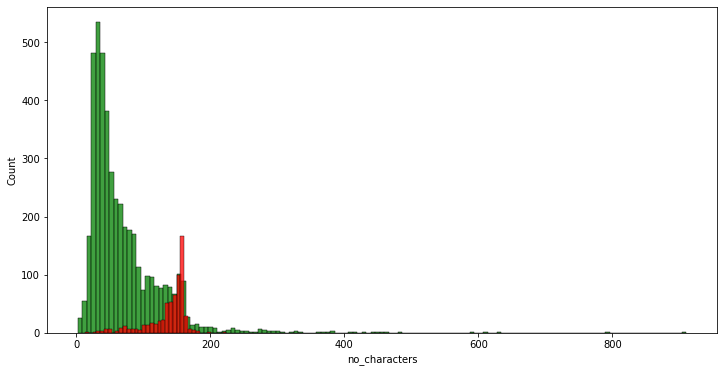

In [94]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#hm
sns.histplot(df[df['target'] == 0]['no_characters'],color='green')
#spam
sns.histplot(df[df['target'] == 1]['no_characters'],color='red')

<AxesSubplot: xlabel='no_words', ylabel='Count'>

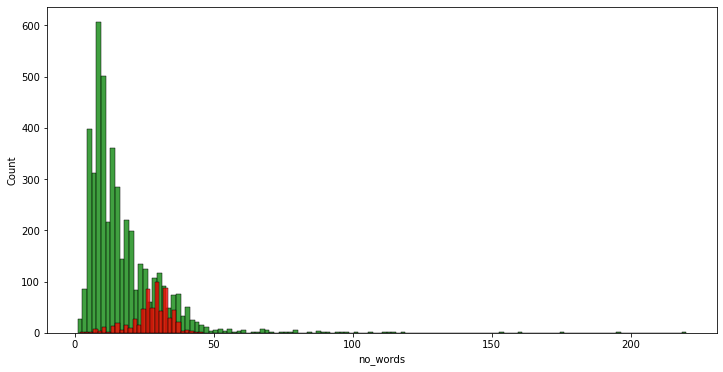

In [95]:
#histogram about number of charecters in ham & spam

plt.figure(figsize=(12,6))
#ham
sns.histplot(df[df['target'] == 0]['no_words'],color='green')
#spam
sns.histplot(df[df['target'] == 1]['no_words'], color = 'red')

C:\Users\piyas\AppData\Local\Temp\ipykernel_21232\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

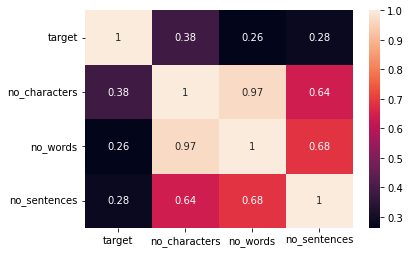

In [96]:
sns.heatmap(df.corr(),annot=True)


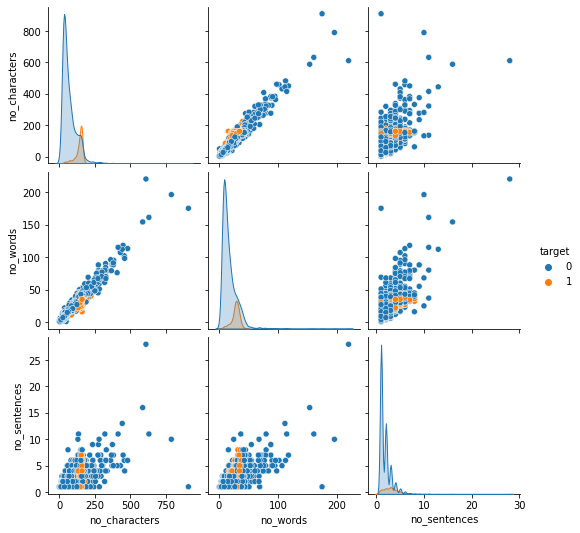

In [97]:
sns.pairplot(df,hue='target')

In [98]:
# Data Preprocessing 

#stopwords array

spw=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [99]:
# function for following processes

def transform_text(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #Removing stop words and punctuation
    from nltk.corpus import stopwords
    import string
    for i in text:
        if i not in spw and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [100]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon talk stuff tonight cri today'

In [101]:
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(10)

C:\Users\piyas\AppData\Local\Temp\ipykernel_21232\3674237431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,no_characters,no_words,no_sentences,transformed_text
1985,0,The length is e same but e top shorter n i got...,123,34,4,length shorter fring thk liao lazi dun wan 2 d...
1088,1,You are awarded a SiPix Digital Camera! call 0...,153,32,8,award sipix digit camera 09061221061 landlin d...
788,1,"5 Free Top Polyphonic Tones call 087018728737,...",158,32,3,5 free polyphon tone 087018728737 nation rate ...
4993,0,My drive can only be read. I need to write,42,11,2,drive read write
3455,0,Ok. I.ll do you right later.,28,7,1,
5514,0,Oh... Okie lor...We go on sat...,33,10,1,oki lor sat
5359,0,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,133,39,2,face test 1 2 3 4 5 6 7 8 9 gt select number f...
5398,0,Hi. Hope you had a good day. Have a better night.,49,14,3,hope good day night
91,0,Sorry to be a pain. Is it ok if we meet anothe...,195,44,4,pain meet night spent late afternoon casualti ...
4271,0,Where to get those?,19,5,1,


In [102]:
# Model Building

#to convert the texts in a vector ()

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()                                         #bag of words
tfidf = TfidfVectorizer(max_features=3000)                     #tf-idf

In [103]:
m = cv.fit_transform(df['transformed_text']).toarray()

In [104]:
m.shape

(5169, 6356)

In [105]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [106]:
#output

y = df['target'].values
y.shape

(5169,)

In [107]:
#spiliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [108]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import re

In [109]:
#Multinomial naive bayes 

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9748549323017408
0.9912280701754386


In [110]:
### Function to check a Messege spam or not on the basis of our Model

In [111]:
def isSpam(s):
    s=re.sub(pattern='[^a-zA-Z]',repl=' ',string=s)          #to make alphaneumeric
    s=s.lower()                                              #to make lowercase
    s_words = s.split()                                      #to divide in words
    s_words=[word for word in s_words if not word in spw]    #deleting the stopwords
    ps = PorterStemmer()
    message=[ps.stem(word) for word in s_words]              #stemming
    message = ' '.join(message)

In [112]:
from nltk.stem import PorterStemmer

In [113]:
ans=['Broo, this is a SPAM!','Ohhh, this is a normal message.']

In [114]:
msg="FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
if isSpam(msg):
    print(ans[0])
else:
    print(ans[1])

Ohhh, this is a normal message.


In [117]:
import pickle
pickle.dump(mnb,open('spam_detection.pkl','wb'))